In [2]:
# -------------------------------
# Diabetes Regression Project
# -------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------------
# Load dataset via sklearn API
# -------------------------------
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:


df.info()
df.describe()
df.shape
df.columns
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [4]:
# Optional: Check and remove duplicates
print("Number of duplicates:", df.duplicated().sum())
df = df.drop_duplicates()
df.shape



Number of duplicates: 0


(442, 11)

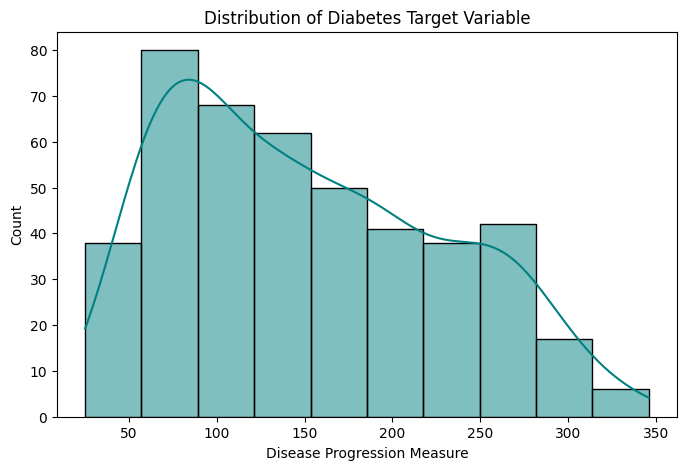

In [5]:
# Target distribution
plt.figure(figsize=(8,5))
sns.histplot(df['target'], kde=True, color='teal')
plt.title("Distribution of Diabetes Target Variable")
plt.xlabel("Disease Progression Measure")
plt.ylabel("Count")
plt.show()


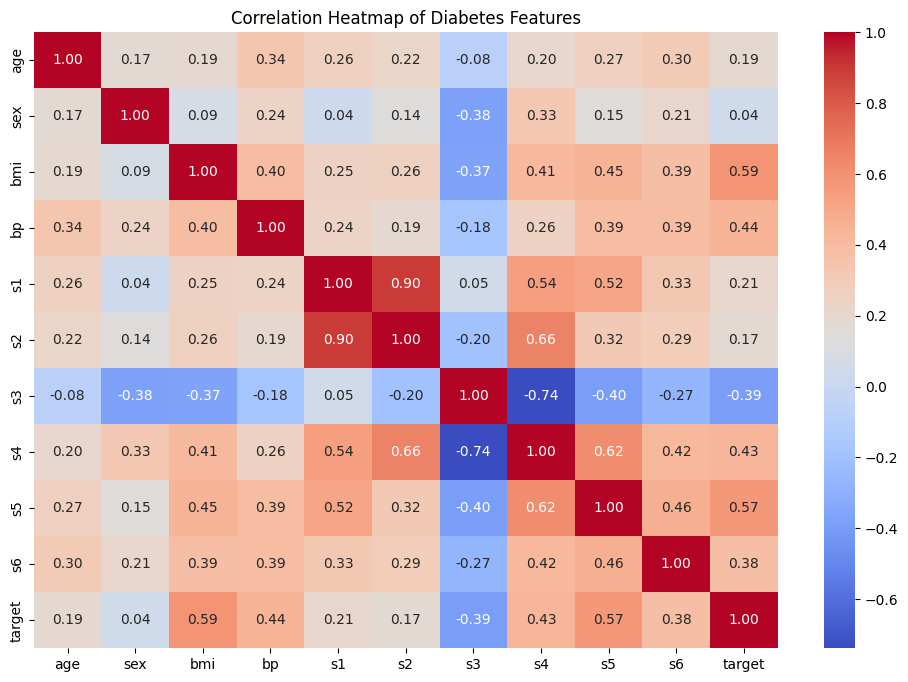

In [6]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Diabetes Features")
plt.show()


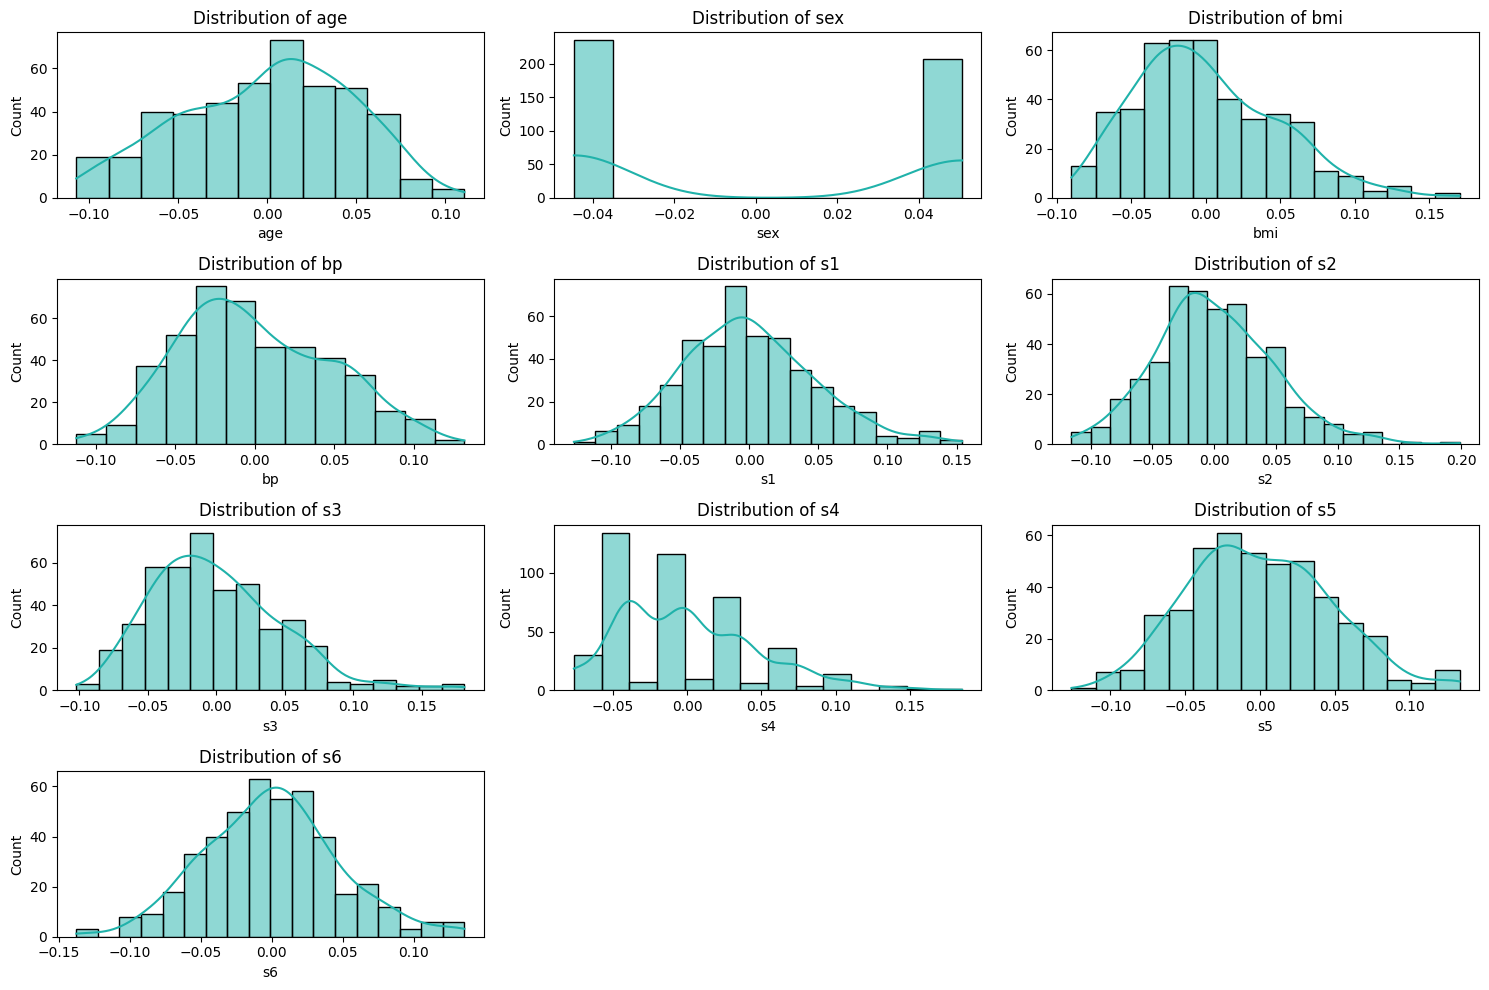

In [7]:
# Feature distributions
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col], kde=True, color='lightseagreen')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


In [8]:
# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (353, 65)
Test shape: (89, 65)


In [9]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
coeff_df = pd.DataFrame(model.coef_, columns=['Coefficient'])
print("Coefficients shape:", coeff_df.shape)
print(coeff_df.head())

# Intercept
print("Intercept:", model.intercept_)


Coefficients shape: (65, 1)
   Coefficient
0     5.176440
1   -14.600723
2    20.071580
3    18.613086
4  -808.506781
Intercept: 65.70605410760965


In [10]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", round(rmse, 3))
print("R² Score:", round(r2, 3))



Root Mean Squared Error: 55.642
R² Score: 0.416


In [11]:
# Compare actual vs predicted
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.round(y_pred,2)})
comparison.head(20)


,Actual,Predicted
0,219.0,116.40
1,70.0,162.03
2,202.0,175.49
3,230.0,412.42
4,111.0,98.86
5,84.0,71.32
6,242.0,279.18
7,272.0,225.12
8,94.0,96.69
9,96.0,105.32


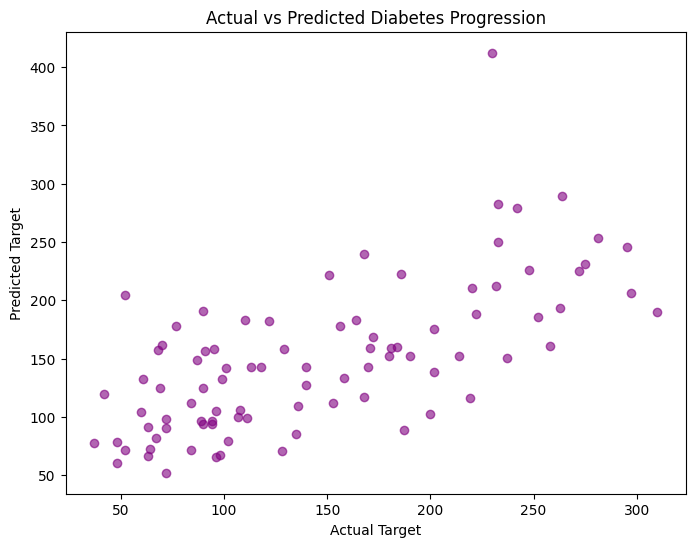

In [12]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Actual vs Predicted Diabetes Progression")
plt.show()


<Figure size 1200x600 with 0 Axes>

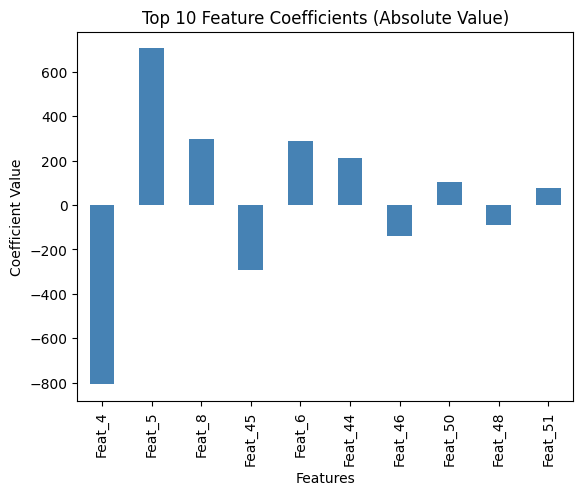

In [13]:
# Feature importance (Top 10 by absolute coefficient)
coeff_df['Feature'] = [f"Feat_{i}" for i in range(coeff_df.shape[0])]
coeff_df_sorted = coeff_df.reindex(coeff_df.Coefficient.abs().sort_values(ascending=False).index)

plt.figure(figsize=(12,6))
coeff_df_sorted.head(10).plot(kind='bar', x='Feature', y='Coefficient', legend=False, color='steelblue')
plt.title("Top 10 Feature Coefficients (Absolute Value)")
plt.ylabel("Coefficient Value")
plt.xlabel("Features")
plt.show()
